# Assignment 7: Cython

In [78]:
#Imports:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

## Step 1

In [79]:
arr_1 = np.random.rand(10, 10)
arr_2 = np.random.rand(10, 10)

Naive matrix multiplication function (written in Python)

In [80]:
def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [109]:
print("np.matmul      : ",end="")
%timeit -n 50 -r 5 arr_1 @ arr_2

print("matrix_multiply: ",end="")
%timeit -n 50 -r 5 matrix_multiply(arr_1,arr_2)

np.matmul      : 29.4 µs ± 7.12 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)
matrix_multiply: 77.4 ms ± 581 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)


Now, we find FLOPS and GFLOPS

The total number of Floating Point Operations for the multiplication of two $N \times N$ matrices is $2 N^{3}$. This comes from $N^{3}$ multiplications. The total number of Operations is assumed to be twice the number of multiplications.

The number of Floating Point Operations here is, therefore, 2000

We find FLOPS and GFLOPS using the relation:

$$\text{FLOPS} = \frac{\text{Number of Operations}}{\text{Time Taken (in s)}}$$

Code to do the same is given below, substituting the values from above:


In [82]:
GFLOPS_np_mul = 2/((10**6)*time_np_mul.average)
GFLOPS_naive_mul = 2/((10**6)*time_naive_mul.average)

print("GFLOPS for np.matmul:      :","{:.3f}".format(GFLOPS_np_mul))
print("GFLOPS for matrix_multiply :","{:.3f}".format(GFLOPS_naive_mul))

GFLOPS for np.matmul:      : 0.885
GFLOPS for matrix_multiply : 0.002


## Step 2: Comparison between Values Obtained and Processor Frequency
- Running `lscpu`, the frequncy of the Processor in Jupyter Notebooks was $2099.998$ MHz. Assuming one operation per clock cycle, the GFLOPS would come out to be $2.099$. 
- The value obtained in a run was $0.774$ GFLOPS for `np.matmul` and $0.004$ GFLOPS for `matrix_multiply`.
- The GFLOPS assumed using CPU Clock Frequency is, hence,  $2.71$ and $525$ times these values respectively

## Step 3: Increasing the Matrix Size
Now we keep doubling the matrix size and plot graph between the times for each function:

4.74 ms ± 12.9 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
71.4 ms ± 7.49 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
336 ms ± 49.1 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
3.17 s ± 460 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


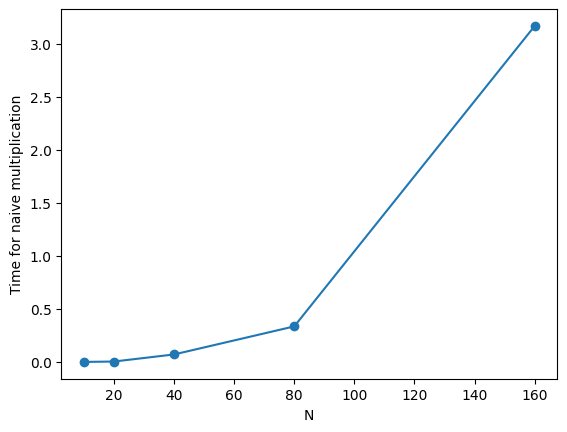

In [83]:
%matplotlib inline

naive_mul_data = [time_naive_mul.average]
order_naive=[10]

N=20

while naive_mul_data[-1]<1:
    arr_1=np.random.rand(N,N)
    arr_2=np.random.rand(N,N)
    
    time_naive_mul = %timeit -o -n 1 -r 3 matrix_multiply(arr_1, arr_2)

    naive_mul_data.append(time_naive_mul.average)
    order_naive.append(N)
    N*=2

plt.clf()
plt.xlabel("N")
plt.ylabel("Time for naive multiplication")
plt.plot(order_naive, naive_mul_data, marker='o')
plt.show()

The slowest run took 11.38 times longer than the fastest. This could mean that an intermediate result is being cached.
20 µs ± 21.3 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
32.5 µs ± 17.9 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
164 µs ± 94.7 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
277 µs ± 40.8 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
The slowest run took 19.37 times longer than the fastest. This could mean that an intermediate result is being cached.
20.3 ms ± 13.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
74.1 ms ± 18.7 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
169 ms ± 25.5 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
888 ms ± 2.39 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
6.14 s ± 109 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


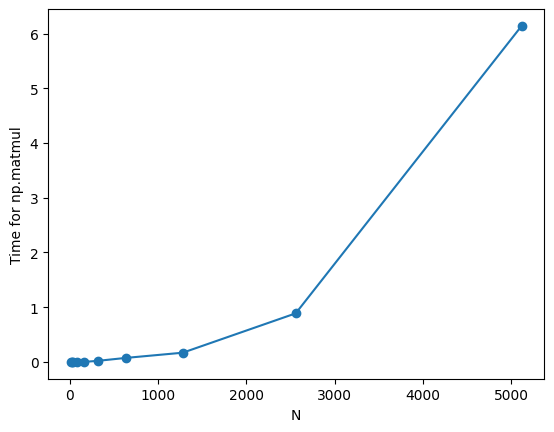

In [84]:
%matplotlib inline

np_mul_data = [time_np_mul.average]
order_np=[10]

N=20

while np_mul_data[-1]<1:
    arr_1=np.random.rand(N,N)
    arr_2=np.random.rand(N,N)
    
    time_np_mul = %timeit -o -n 1 -r 3 arr_1 @ arr_2

    np_mul_data.append(time_np_mul.average)

    order_np.append(N)
    N*=2

plt.clf()
plt.xlabel("N")
plt.ylabel("Time for np.matmul")
plt.plot(order_np, np_mul_data, marker='o')
plt.show()

I have set the flags `-n` and `-r` to 1 and 3 respectively. This is due to the pretty severe time constraint on the execution time. `-r` set to 3 makes sure that the values obtained are devoid of errors due to other processes and other factors

The threshold for `naive_mul_data[-1]` and `np_mul_data[-1]` are set to $1$ $s$ because for the next iteration, the time will increase the runtime of the `%timeit` function substantially.

The graph between execution time and order is, as expected, exponentially increasing.


Now we plot a graph between the data obtained for naive `matrix_multiply` and `np.matmul`:

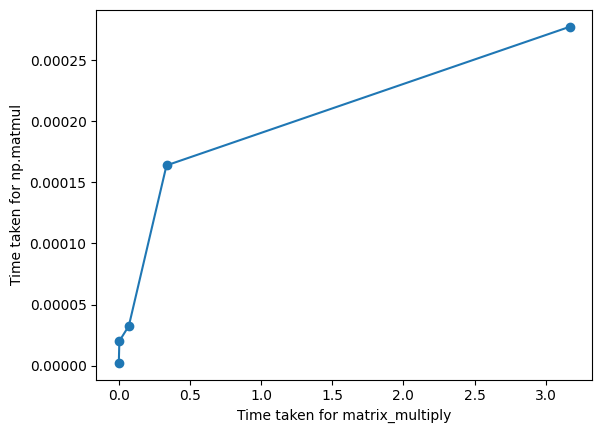

In [85]:
np_mul_data_new=np_mul_data[:len(naive_mul_data)]

plt.clf()
plt.xlabel("Time taken for matrix_multiply")
plt.ylabel("Time taken for np.matmul")
plt.plot(naive_mul_data,np_mul_data_new,marker="o")

The graph, as expected, is close to a straight line.

This could be reasonably guessed as the GFLOPS for each of the methods can be almost constant. Also, the time taken would be of the sort $$t_{\text{mul}}=\frac{2N^{3}}{\text{GFLOPS}}$$ The ratio of these for both of these would be, then:$$\frac{\text{GFLOPS for Naive Multiplication}}{\text{GFLOPS for np.matmul}}$$

Now, we estimate and plot the GFLOPS for each of these methods and plot:

<Figure size 640x480 with 0 Axes>

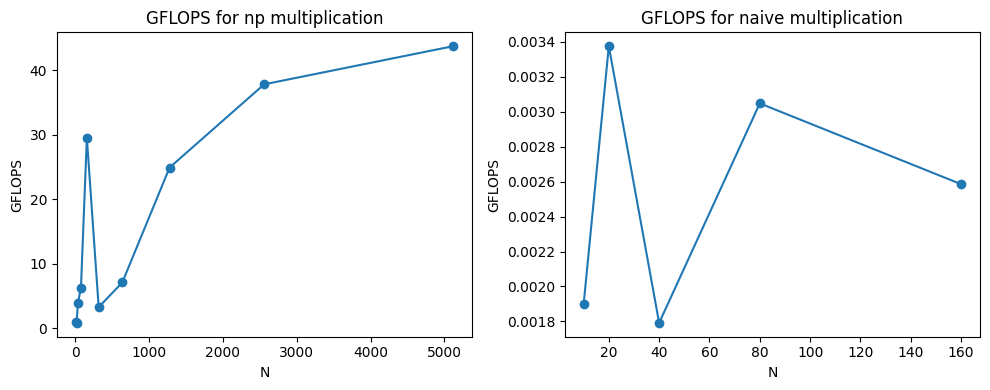

In [86]:
GFLOPS_mul_factor_np = np.array([2*8**i/(10**6) for i in range(len(np_mul_data))])
GFLOPS_mul_factor_naive = np.array([2*8**i/(10**6) for i in range(len(naive_mul_data))])

GFLOPS_np_mul = GFLOPS_mul_factor_np/np.array(np_mul_data)
GFLOPS_naive_mul = GFLOPS_mul_factor_naive/np.array(naive_mul_data)

plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) 

ax1.plot(order_np, GFLOPS_np_mul,marker='o')
ax1.set_title('GFLOPS for np multiplication')
ax1.set_xlabel("N")
ax1.set_ylabel("GFLOPS")

ax2.plot(order_naive, GFLOPS_naive_mul,marker='o')
ax2.set_title('GFLOPS for naive multiplication')
ax2.set_xlabel("N")
ax2.set_ylabel("GFLOPS")

plt.tight_layout() 
plt.show()

- It is found that the GFLOPS for `np.matmul` is atleast of the order $10^{3}$ times of naive multiplication algorithm for smaller matrices.

- As N increases, the GFLOPS for `np.matmul` increases. It increases to almost 50 times the theoretical value. This is due to the fact that numpy uses multiple optimisations for matrix multiplication such as:
    - It is implemented in C and a lot of operations are performed in low-level code.
    - Parallel Processing: It can use multiple cores of the CPU for better computation speeds. This means, as the CPU has 16 cores, it can go till 32 GFLOPS, assuming one operation per clock cycle. 
    - Better Algorithm: It can perform multiplications with algorithms that have a complexicity of less than O($n^{3}$)
    - CPU Optimisations: NumPy can make use of Low-Level CPU optimisations, enabling better results.
    - Cache Optimisation: Optimises cache usage to reduce execution time significantly.


- As N increases, however, the calculated GFLOPS for `matrix_multiply` sort of jumps around. This is pretty random and due to other processes and randomness in execution time. The reason this exists is because the number of iterations and runs were less.

## Step 4: Implementing Cython
We implement Cython to the naive algorithm made above and compare it with the original naive algorithm for multiplication

In [89]:
%%cython -a
import cython
import numpy as np

def cy_matmul(u, v):
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


## Further Improvements using Cython

- The following changes have been made to the initial `cy_matmul` function, and these are given below: 
    1. Declare each of the variables i, j, k, m, n, p as int types
    2. Use the decorator function `@cython.boundscheck(False)`
    3. Declare the input variables to be of type `double [:, :]`
    4. Declare output to be of type `double[:,:]`
    5. Declare all of these as `float[:,:]` instead of `double[:,:]`

### Transformation 1

In [104]:
%%cython -a
import cython
import numpy as np

def cy_matmul_1(u, v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res=np.zeros((m,p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Transformation 2

In [ ]:
%%cython -a
import cython
import numpy as np

@cython.boundscheck(False)
def cy_matmul_2(u, v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res=np.zeros((m,p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Transformation 3

In [ ]:
%%cython -a
import cython
import numpy as np

@cython.boundscheck(False)
def cy_matmul_3(double[:, :] u, double[:, :] v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res=np.zeros((m,p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Transformation 4

In [ ]:
%%cython -a
import cython
import numpy as np

@cython.boundscheck(False)
def cy_matmul_4(double[:, :] u, double[:, :] v, double[:, :]res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Transformation 5

In [ ]:
%%cython -a
import cython
import numpy as np

@cython.boundscheck(False)
def cy_matmul_5(float[:, :] u, float[:, :] v, float[:, :] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i, j] += u[i, k] * v[k, j]
    return res

### Results after Transformations

The results of execution times after each transformation are given below:

In [107]:
res=np.zeros((50,50))
arr_1=np.random.rand(50, 50)
arr_2=np.random.rand(50,50)

timedata=%timeit -o -q -n 10 -r 5 matrix_multiply(arr_1,arr_2) 
print(f"Time after matrix_multiply: {timedata.average*1000} ms")

timedata=%timeit -o -q -n 10 -r 5 cy_matmul(arr_1,arr_2) 
print(f"Time after Cython without optimisations: {timedata.average*1000} ms")

timedata = %timeit -o -q -n 10 -r 5 cy_matmul_1(arr_1,arr_2) 
print(f"Time after Transformation 1: {timedata.average*1000} ms")

timedata = %timeit -o -q -n 10 -r 5 cy_matmul_2(arr_1,arr_2) 
print(f"Time after Transformation 2: {timedata.average*1000} ms")

timedata = %timeit -o -q -n 10 -r 5 cy_matmul_3(arr_1,arr_2) 
print(f"Time after Transformation 3: {timedata.average*1000} ms")

timedata = %timeit -o -q -n 10 -r 5 cy_matmul_4(arr_1,arr_2,res) 
print(f"Time after Transformation 4: {timedata.average*1000} ms")

arr_1=arr_1.astype(np.float32)
arr_2=arr_2.astype(np.float32)
res=res.astype(np.float32)

timedata = %timeit -o -q -n 10 -r 5 cy_matmul_5(arr_1,arr_2,res) 
print(f"Time after Transformation 5: {timedata.average*1000} ms")

Time after matrix_multiply: 63.10012616100721 ms
Time after Cython without optimisations: 53.85796884074807 ms
Time after Transformation 1: 53.52528098039329 ms
Time after Transformation 2: 53.39645263971761 ms
Time after Transformation 3: 28.583691099192947 ms
Time after Transformation 4: 0.16472348012030125 ms
Time after Transformation 5: 0.14804172096773982 ms


- The most significant change was in declaring the output to be of `double [:,:]`. The time reduced by a factor of almost 100.
- However, the best time obtained with cython is still almost 6 times the time taken for $u$ @ $v$
- There was a change of $0.02$ $ms$ when datatypes were changed from `double [:,:]` to `float [:,:]`